In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder # Ensure LabelEncoder is imported here
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Load dataset
data = pd.read_csv('/content/breast_cancer_dataset.csv')

In [5]:
# Task 1: Data Exploration
# Investigate the distribution of the target variable
target_distribution = data['diagnosis'].value_counts()
print("Target Distribution:\n", target_distribution)

# Basic statistics for numerical features
stats = data.describe()
print("Basic Statistics:\n", stats)

Target Distribution:
 diagnosis
B    357
M    212
Name: count, dtype: int64
Basic Statistics:
                  id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360         

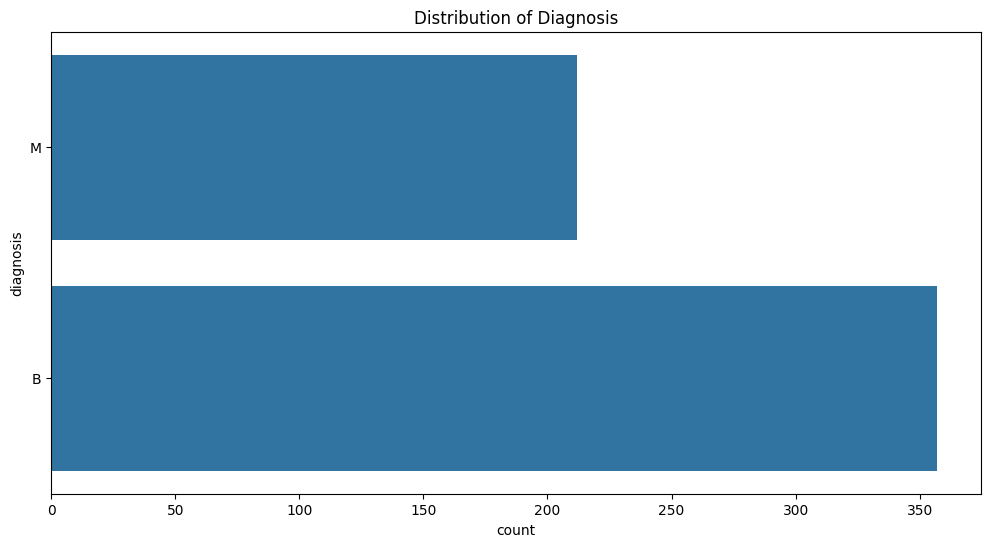

In [6]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.countplot(data['diagnosis'])
plt.title("Distribution of Diagnosis")
plt.show()

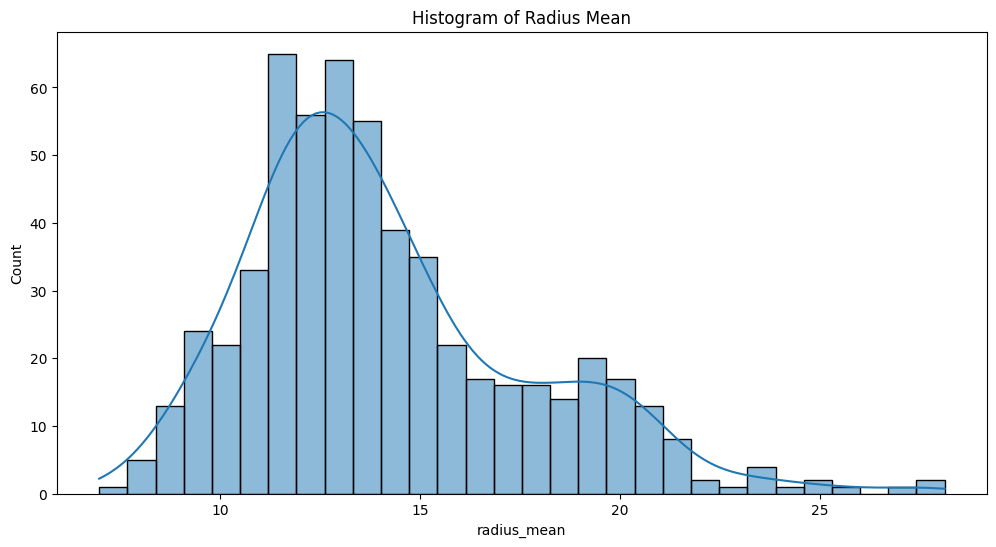

In [7]:
# Plot a histogram for 'radius_mean'
plt.figure(figsize=(12, 6))
sns.histplot(data['radius_mean'], kde=True, bins=30)
plt.title("Histogram of Radius Mean")
plt.show()

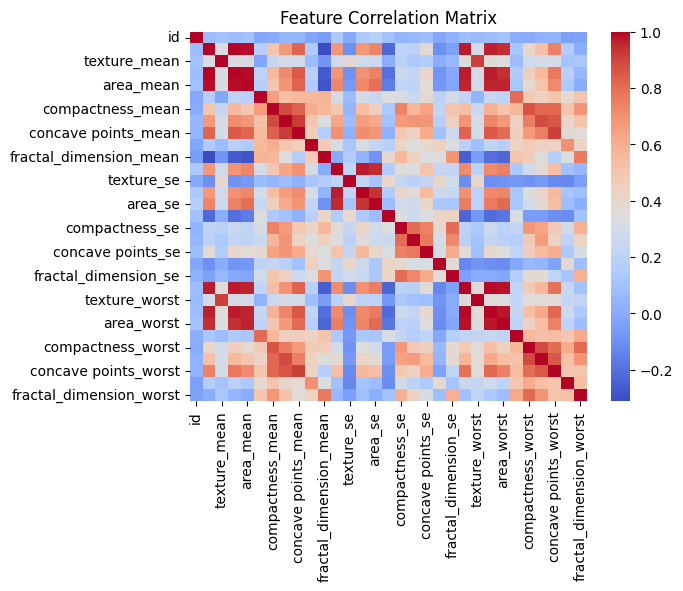

Correlation Matrix of Numerical Features:
                                id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477 

In [8]:
# Correlation coefficients
# Calculate correlation only for numerical columns
correlation_matrix = data.select_dtypes(include=np.number).corr() # Select only numerical types
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Strong correlations
print("Correlation Matrix of Numerical Features:\n", correlation_matrix)

In [10]:
# Task 2: Data Preparation
# Assign diagnosis as target and encode it
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Scaling features
scaler = StandardScaler()
data_scaled = data.copy()
# Scale all numerical columns except 'id'
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')
data_scaled[numerical_cols] = scaler.fit_transform(data[numerical_cols])

Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64



Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



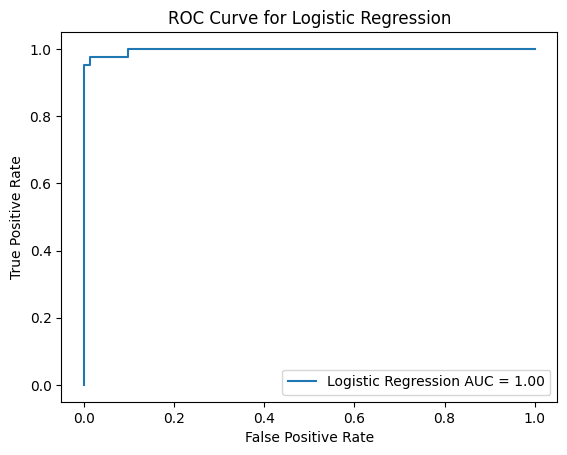


Support Vector Machine Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



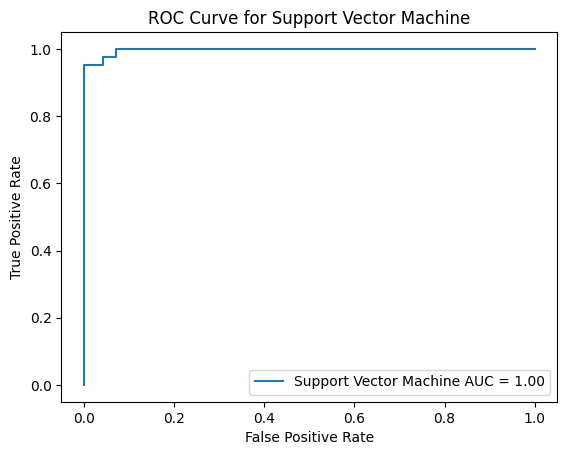


Random Forest Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



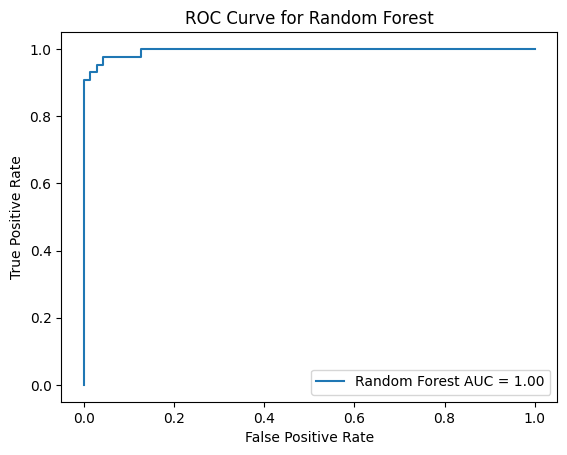

In [22]:
# Task 3: Model Training
# Splitting data
X = data_scaled.drop(['id', 'diagnosis'], axis=1) # Drop 'id' and the target variable 'diagnosis' from features
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
}

model_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n{name} Report:\n")
    print(classification_report(y_test, y_pred))

    # ROC-AUC
    if y_prob is not None:
        auc_score = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} AUC = {auc_score:.2f}')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc='lower right')
        plt.title(f"ROC Curve for {name}")
        plt.show()

    model_metrics[name] = {
        "accuracy": model.score(X_test, y_test),
        "roc_auc": auc_score if y_prob is not None else None
    }

In [23]:
# Display metrics
metrics_df = pd.DataFrame(model_metrics).T
print("\nModel Performance Metrics:\n", metrics_df)


Model Performance Metrics:
                         accuracy   roc_auc
Logistic Regression     0.973684  0.997380
Support Vector Machine  0.973684  0.997380
Random Forest           0.964912  0.995087


In [24]:
# Task 4: Fine-Tuning Top Model
# Example with Random Forest
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model and evaluation
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

print("\nBest Random Forest Report:\n")
print(classification_report(y_test, y_pred_best))

# Pre vs Post tuning comparison
print("\nPre-tuning Accuracy:", model_metrics["Random Forest"]["accuracy"])
print("Post-tuning Accuracy:", best_rf.score(X_test, y_test))


Best Random Forest Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Pre-tuning Accuracy: 0.9649122807017544
Post-tuning Accuracy: 0.9649122807017544
